In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage

In [2]:
from skimage import io, transform, color
from skimage.registration import optical_flow_tvl1, optical_flow_ilk, phase_cross_correlation
from skimage.feature import match_template
import cv2

In [3]:
%matplotlib notebook

In [4]:
full_image = h5py.File('2019c1_Pourzal_image.dat_2022_refit/bnp_fly0002.h5', 'r')

In [5]:
print(full_image.keys())

<KeysViewHDF5 ['MAPS', 'exchange_0', 'exchange_1', 'exchange_2', 'exchange_3', 'exchange_4']>


In [6]:
print(full_image['MAPS'].keys())

<KeysViewHDF5 ['XRF_fits', 'XRF_fits_quant', 'XRF_roi', 'XRF_roi_plus', 'XRF_roi_plus_quant', 'XRF_roi_quant', 'add_float', 'add_long', 'add_string', 'channel_names', 'channel_units', 'ds_amp', 'energy', 'energy_calib', 'extra_pvs', 'extra_pvs_as_csv', 'extra_strings', 'int_spec', 'make_maps_conf', 'max_chan_spec', 'mca_arr', 'scaler_names', 'scaler_units', 'scalers', 'scan_time_stamp', 'us_amp', 'version', 'write_date', 'x_axis', 'y_axis']>


In [7]:
temp = np.array(full_image['MAPS']['channel_names'])
for i in range(len(temp)):
    print(i,temp[i])

0 b'Al'
1 b'Si'
2 b'P'
3 b'S'
4 b'Cl'
5 b'K'
6 b'Ca'
7 b'Ti'
8 b'V'
9 b'Cr'
10 b'Mn'
11 b'Fe'
12 b'Co'
13 b'Ni'
14 b'Cu'
15 b'Zn'
16 b'Ba_L'
17 b'Au_M'
18 b'Pb_M'
19 b's_i'
20 b's_e'
21 b's_a'
22 b'TFY'
23 b'Bkgnd'


In [8]:
full_image_fits = full_image['MAPS']['XRF_fits']

In [9]:
full_image_fits.shape

(24, 667, 534)

<IPython.core.display.Javascript object>


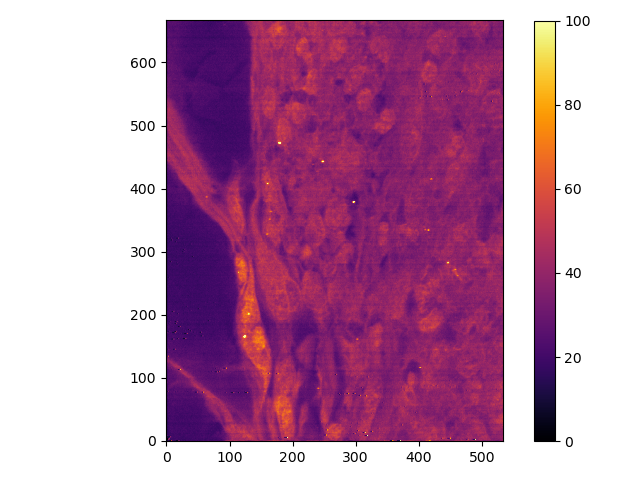

In [209]:
plt.figure()

plt.imshow(full_image_fits[22,:,:],origin='lower',vmin=0,vmax=100,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [11]:
# fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(10,4))

# im1 = ax[0].imshow(XRF_fits[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
# ax[0].set_title('XRF_fits')
# divider = make_axes_locatable(ax[0])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im1, cax=cax, orientation='vertical')

# im2 = ax[1].imshow(XRF_roi[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
# ax[1].set_title('XRF_roi')
# divider = make_axes_locatable(ax[1])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im2, cax=cax, orientation='vertical')


# im3 = ax[2].imshow(XRF_roi_plus[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
# ax[2].set_title('XRF_roi_plus')
# divider = make_axes_locatable(ax[2])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im3, cax=cax, orientation='vertical')




# plt.tight_layout()

In [12]:
crop_image_1 = h5py.File('2019c1_Pourzal_image.dat_2022_refit/bnp_fly0003.h5', 'r')

In [13]:
crop_image_1_fits = crop_image_1['MAPS']['XRF_fits']

In [14]:
crop_image_1_fits.shape

(24, 226, 226)

<IPython.core.display.Javascript object>


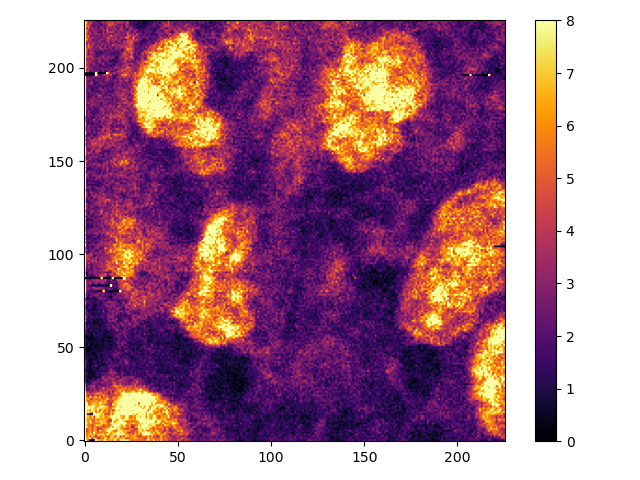

In [165]:
plt.figure()

plt.imshow(crop_image_1_fits[6,:,:],origin='lower',vmin=0,vmax=8,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [16]:
crop_image_2 = h5py.File('2019c1_Pourzal_image.dat_2022_refit/bnp_fly0004.h5', 'r')

In [17]:
crop_image_2_fits = crop_image_2['MAPS']['XRF_fits']

<IPython.core.display.Javascript object>


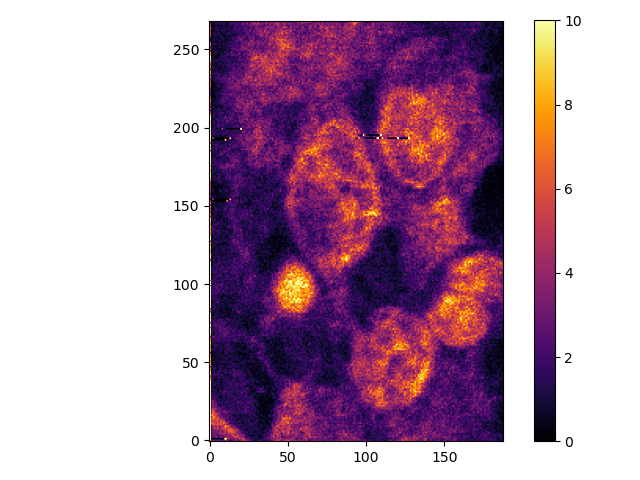

In [166]:
plt.figure()

plt.imshow(crop_image_2_fits[6,:,:],origin='lower',vmin=0,vmax=10,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [183]:
img1_full = full_image_fits[6,:,:]
img1_crop_1 = crop_image_1_fits[6,:,:]
img1_crop_2 = crop_image_2_fits[6,:,:]

In [184]:
img1_full[img1_full > 15] = 0
img1_crop_1[img1_crop_1 > 15] = 0
img1_crop_2[img1_crop_2 > 15] = 0

<IPython.core.display.Javascript object>


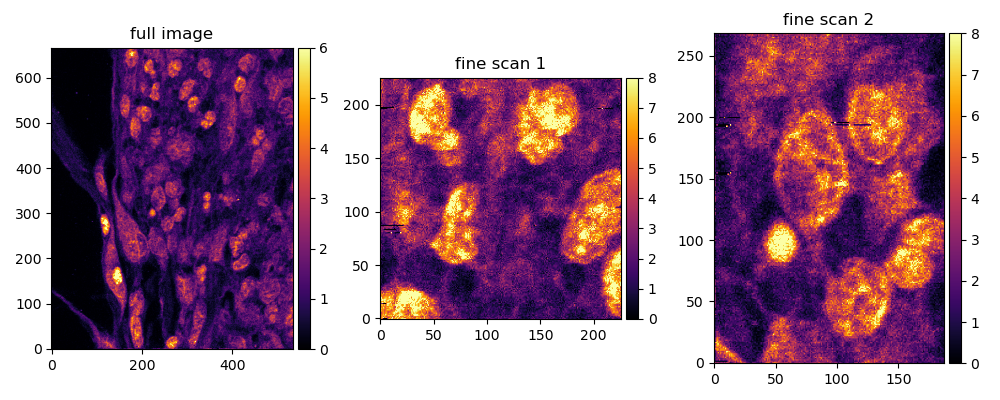

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(10,4))

im1 = ax[0].imshow(img1_full,origin='lower',vmin=0,vmax=6,cmap='inferno')
ax[0].set_title('full image')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[1].imshow(img1_crop_1,origin='lower',vmin=0,vmax=8,cmap='inferno')
ax[1].set_title('fine scan 1')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')


im3 = ax[2].imshow(img1_crop_2,origin='lower',vmin=0,vmax=8,cmap='inferno')
ax[2].set_title('fine scan 2')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')




plt.tight_layout()

In [186]:
#### normalize the inensity #######
def normalize_2d_array(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    return (arr - min_val) / (max_val - min_val) if max_val > min_val else np.zeros_like(arr)

In [187]:
# Example 2D array
# Normalize the array
img1_full_nor = normalize_2d_array(img1_full)
img1_crop_1_nor = normalize_2d_array(img1_crop_1)
img1_crop_2_nor = normalize_2d_array(img1_crop_2)

In [188]:
# np.max(img1_full)

<IPython.core.display.Javascript object>


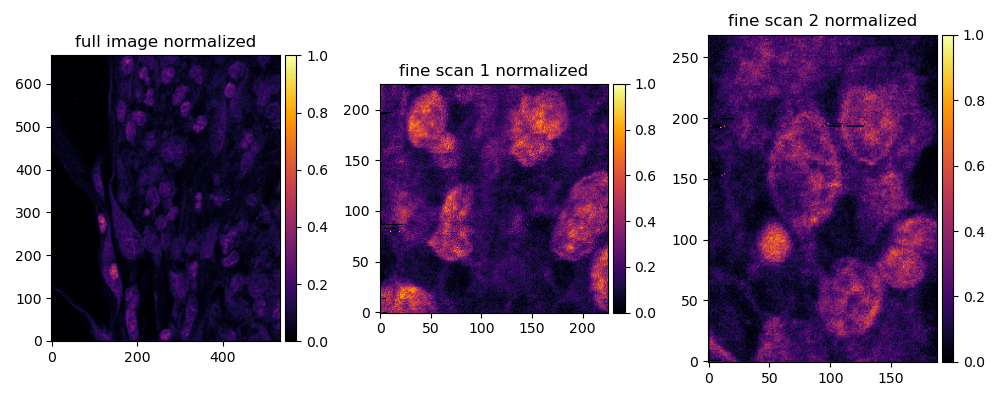

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(10,4))

im1 = ax[0].imshow(img1_full_nor,origin='lower',vmin=0,vmax=1,cmap='inferno')
ax[0].set_title('full image normalized')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[1].imshow(img1_crop_1_nor,origin='lower',vmin=0,vmax=1,cmap='inferno')
ax[1].set_title('fine scan 1 normalized')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')


im3 = ax[2].imshow(img1_crop_2_nor,origin='lower',vmin=0,vmax=1,cmap='inferno')
ax[2].set_title('fine scan 2 normalized')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


plt.tight_layout()

In [190]:
# Load the images
img_crop = img1_crop_1_nor
img_full = img1_full_nor

# # Ensure images are in the correct format (convert to uint8 if necessary)
# if img_crop.dtype != np.uint8:
#     img_crop = cv2.normalize(img_crop, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
# if img_full.dtype != np.uint8:
#     img_full = cv2.normalize(img_full, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Use template matching to find the best match while maintaining aspect ratio
h, w = img_crop.shape

# Search over multiple scales to find the best match
best_scale = None
best_location = None
best_match_val = -np.inf  # Initialize with the lowest possible match score

scale_range = np.linspace(0.5, 2.0, 200)  # Try different scales from 50% to 200%

for scale in scale_range:
    resized_crop = cv2.resize(img_crop, (int(w / scale), int(h / scale)))  # Resize keeping aspect ratio

    # Match template
    result = cv2.matchTemplate(img_full, resized_crop, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Update best match
    if max_val > best_match_val:
        best_match_val = max_val
        best_location = max_loc
        best_scale = scale

# Get the best match position
if best_location:
    top_left = best_location
    h_resized, w_resized = int(h / best_scale), int(w / best_scale)
    bottom_right = (top_left[0] + w_resized, top_left[1] + h_resized)

    # Draw the rectangle on the full image
    img_full_marked = img_full.copy()
    img_full_marked = cv2.cvtColor(img_full_marked, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(img_full_marked, top_left, bottom_right, (0, 255, 0), 3)

    # Print the bounding box coordinates
    print("Bounding box coordinates in the full image:")
    print(f"{top_left}, {bottom_right}, Best Scale: {best_scale}")

else:
    print("Failed to locate the cropped region.")
    
# img_crop = img1_crop_1_nor
# img_full = img1_full_nor


Bounding box coordinates in the full image:
(191, 522), (311, 642), Best Scale: 1.871859296482412


C:\Users\maz_b\AppData\Local\Temp/ipykernel_10740/2890597656.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x,y = np.int(top_left[0]*best_scale), np.int(top_left[1]*best_scale)


<IPython.core.display.Javascript object>


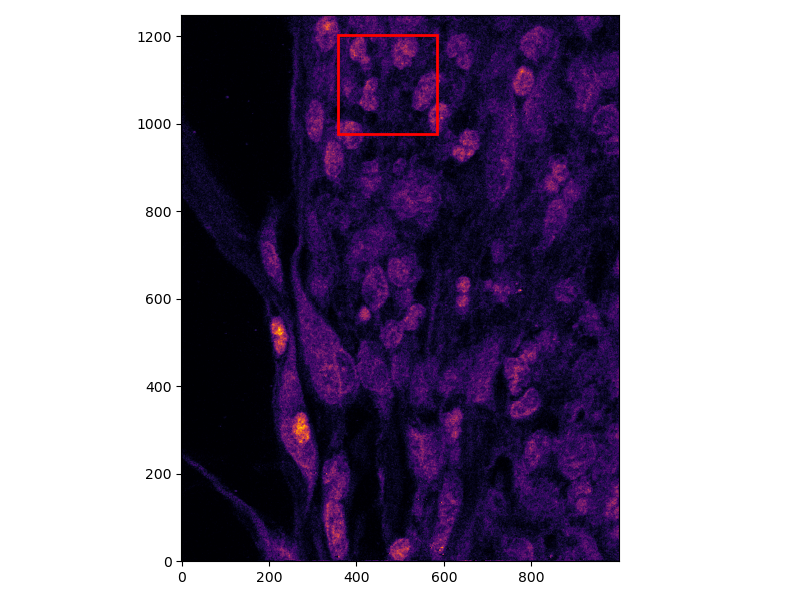

<IPython.core.display.Javascript object>


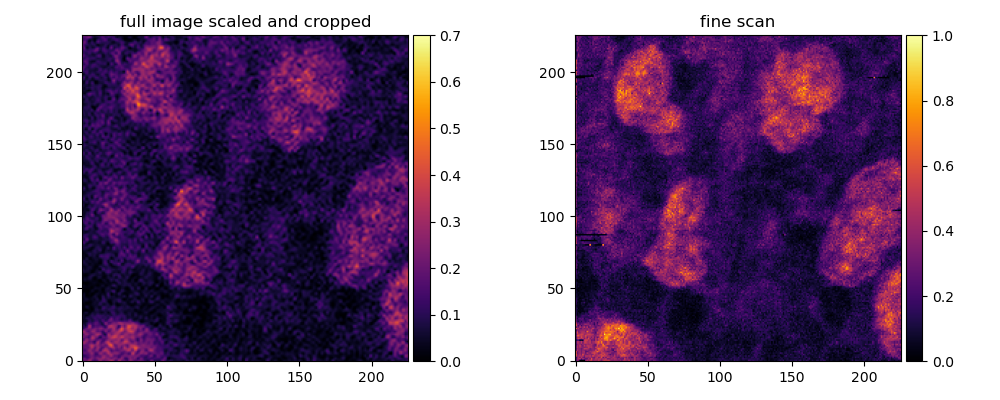

In [191]:
x,y = np.int(top_left[0]*best_scale), np.int(top_left[1]*best_scale)
image_full_scaled = scipy.ndimage.zoom(img_full, best_scale, order=3)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(image_full_scaled, cmap='inferno',origin='lower',vmin=0,vmax=0.7)
rect = plt.Rectangle((x, y), img_crop.shape[1], img_crop.shape[0], edgecolor='r', facecolor='none', linewidth=2)
ax.add_patch(rect)

plt.tight_layout()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

im1 = ax[0].imshow(image_full_scaled[y:y+img_crop.shape[0],x:x+img_crop.shape[1]],origin='lower',vmin=0,vmax=0.7,cmap='inferno')
ax[0].set_title('full image scaled and cropped')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[1].imshow(img_crop,origin='lower',vmin=0,vmax=1,cmap='inferno')
ax[1].set_title('fine scan')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()


# img_found = full[y:y+crop.shape[0],x:x+crop.shape[1]]
# img_target = crop

In [192]:
img_found = image_full_scaled[y:y+img_crop.shape[0],x:x+img_crop.shape[1]]
img_target = img_crop

In [193]:
########## phase cross correlation for global registration ########## 

shift, error, diffphase = phase_cross_correlation(img_found, img_target)
print(f"Shift in X: {shift[1]}")
print(f"Shift in Y: {shift[0]}")

Shift in X: 0.0
Shift in Y: 0.0


In [194]:
# ########## rigid transformation to align the two image ##########

# rigid_shift = transform.EuclideanTransform(translation=(-shift[1],-shift[0]))
# img_target_shift = transform.warp(img_target, rigid_shift)

In [195]:
########## Calculate the optical flow for local distortion ##########
# the two images need normalization before this operation

# v1,u1 = optical_flow_tvl1(img_found, img_target)
v1,u1 = optical_flow_ilk(img_found, img_target)


In [196]:
# Use the estimated optical flow for registration

nr, nc = img_target.shape
row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')

img_target_warp = transform.warp(img_target, np.array([row_coords + v1, col_coords + u1]), mode='edge')

In [197]:
# Normalization for forming RGB images to display the difference

img_found = (img_found - img_found.min()) / (img_found.max() - img_found.min())
img_target = (img_target - img_target.min()) / (img_target.max() - img_target.min())
img_target_warp_n = (img_target - img_target_warp.min()) / (img_target_warp.max() - img_target_warp.min())

<IPython.core.display.Javascript object>


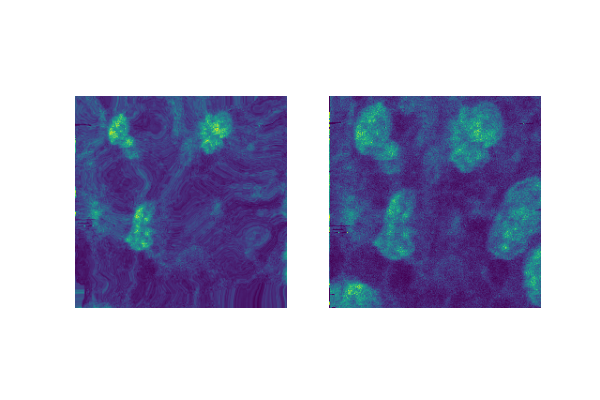

In [198]:
# Display

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 4))

ax0.imshow(img_target_warp,origin = 'lower')
ax0.set_title("")
ax0.set_axis_off()

ax1.imshow(img_target_warp_n,origin = 'lower')
ax1.set_title("")
ax1.set_axis_off()

In [199]:
# Build an RGB image with the sequence after global registration

seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = img_target
seq_im[..., 1] = img_found
seq_im[..., 2] = img_found

In [200]:
# Build an RGB image with the registered sequence

reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = img_target_warp_n
reg_im[..., 1] = img_found
reg_im[..., 2] = img_found

<IPython.core.display.Javascript object>


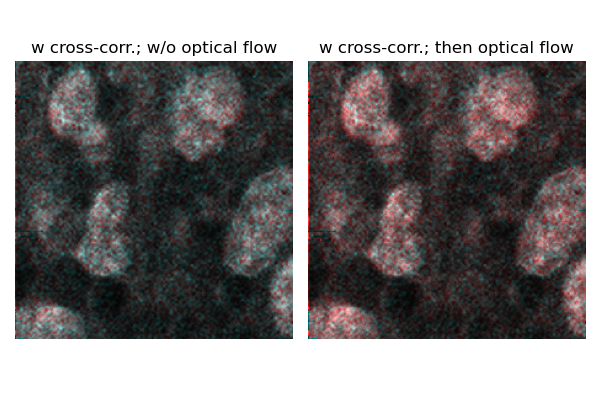

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [201]:
# Display

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 4))

ax0.imshow(seq_im,origin = 'lower')
ax0.set_title("w cross-corr.; w/o optical flow")
ax0.set_axis_off()

ax1.imshow(reg_im,origin = 'lower')
ax1.set_title("w cross-corr.; then optical flow")
ax1.set_axis_off()

fig.tight_layout()

In [202]:
# Compute flow magnitude

norm = np.sqrt(u1**2 + v1**2)

In [203]:
# Threshold ( e.g. 5 pixel )
threshold = 3
mask = np.where (norm > threshold, 1, 0)
u1_filtered = u1 * mask
v1_filtered = v1 * mask

In [204]:
# Quiver plot arguments

nvec = 40  # Number of vectors to be displayed along each image dimension
nl, nc = img_found.shape
step = max(nl // nvec, nc // nvec)

y, x = np.mgrid[:nl:step, :nc:step]
u = u1_filtered[::step, ::step] 
v = v1_filtered[::step, ::step]

<IPython.core.display.Javascript object>


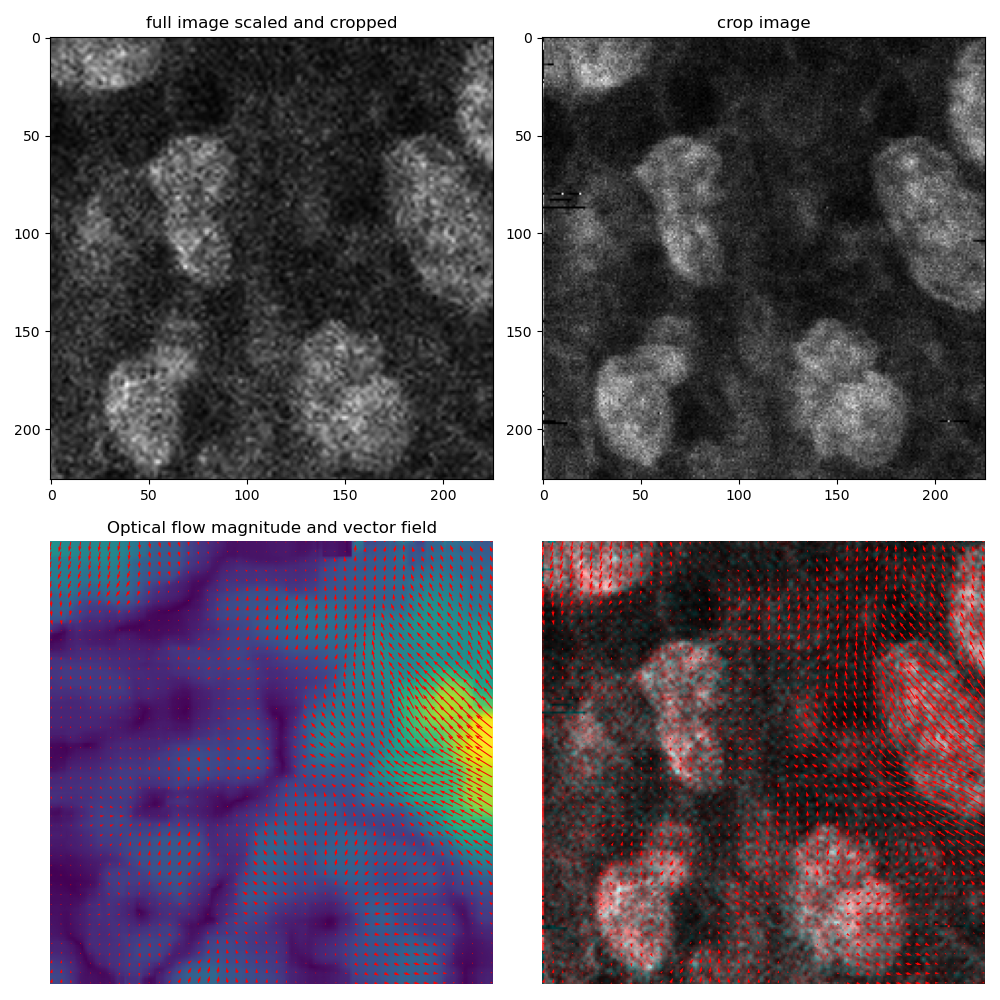

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [205]:
# Display

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].imshow(img_found, cmap='gray')
ax[0,0].set_title("full image scaled and cropped")

ax[0,1].imshow(img_target, cmap='gray')
ax[0,1].set_title("crop image")

ax[1,0].imshow(norm)
ax[1,0].quiver(x, y, u, v, color='r', units='dots', angles='xy', scale_units='xy', lw=10)
ax[1,0].set_title("Optical flow magnitude and vector field")
ax[1,0].set_axis_off()

ax[1,1].imshow(reg_im, cmap='gray')
ax[1,1].quiver(x, y, u, v, color='r', units='dots', angles='xy', scale_units='xy', lw=10)
ax[1,1].set_axis_off()

fig.tight_layout()

plt.show()

In [206]:
norm_flat = norm.flatten()

<IPython.core.display.Javascript object>


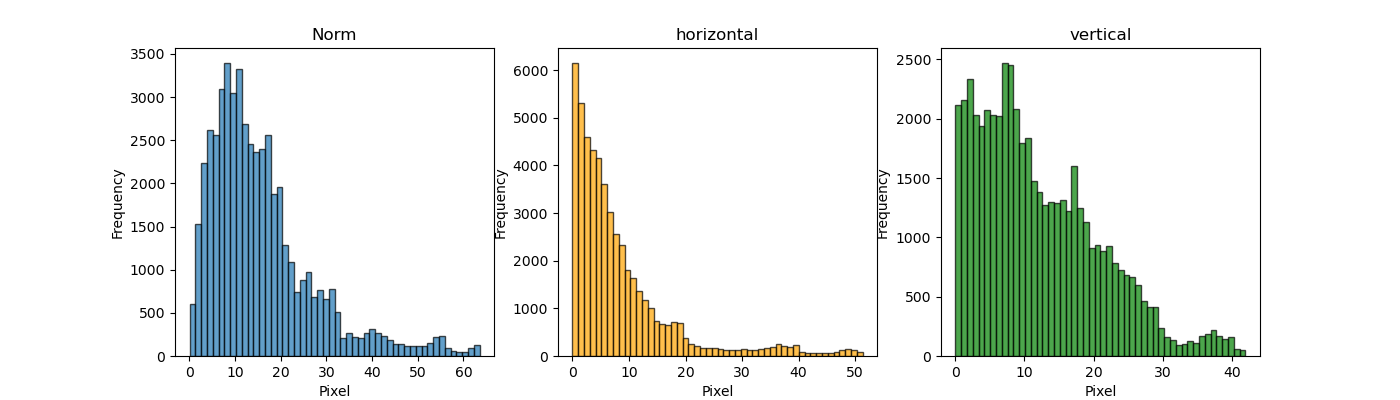

Text(0, 0.5, 'Frequency')

In [207]:
# histograph of norm, u1, v1
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

axs[0].hist(norm_flat, bins=50, edgecolor='black', alpha=0.7)
axs[0].set_title('Norm')
axs[0].set_xlabel('Pixel')
axs[0].set_ylabel('Frequency')

axs[1].hist(abs(u1.flatten()), bins=50, edgecolor='black', alpha=0.7, color='orange')
axs[1].set_title('horizontal')
axs[1].set_xlabel('Pixel')
axs[1].set_ylabel('Frequency')

axs[2].hist(abs(v1.flatten()), bins=50, edgecolor='black', alpha=0.7, color='green')
axs[2].set_title('vertical')
axs[2].set_xlabel('Pixel')
axs[2].set_ylabel('Frequency')